In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
#from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
np.set_printoptions(precision=2)

In [2]:
df=pd.read_excel("house.xlsx")
#data_1=np.array(df).reshape(-1,5) # you can use either numpy function or data frame direct (df)
#x=data_1[:,:4]
#y=data_1[:,4]
x_features=['size(sqft)', 'bedrooms', 'floors', 'age']
x=df[x_features]
y=df[["price"]]
#x_norm=StandardScaler().fit_transform(x) #to normlize or to make feuture scaling but was not neccessary


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
poly_model=make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.01))
poly_model.fit(x_train,y_train)


c:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.46471e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.01))])

In [4]:
# to know if there overfitting
    # Predict on training and testing sets
y_train_pred = poly_model.predict(x_train)
y_test_pred = poly_model.predict(x_test)
    
    # Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"R^2_train={train_r2*100:0.2f}")
print(f"R^2_test={test_r2*100:0.2f}")
print(f"cost function_train={train_mse:0.3f}")
print(f"cost function_test={test_mse:0.3f}")

R^2_train=98.00
R^2_test=97.26
cost function_train=223.320
cost function_test=259.021


In [6]:
print(f"prediction={y_test_pred[:4]}")
print(f"actual{y_test[:4]}")


prediction=[[304.9 ]
 [381.32]
 [363.31]
 [276.6 ]]
actual    price
62  304.0
40  390.0
95  388.0
18  301.0


In [7]:
x_new=np.array([[1200,3,1,40]])
print(f"prediction for the new house for inputs in {x_features}={float(poly_model.predict(x_new)):0.2f}$")

prediction for the new house for inputs in ['size(sqft)', 'bedrooms', 'floors', 'age']=312.80$


c:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


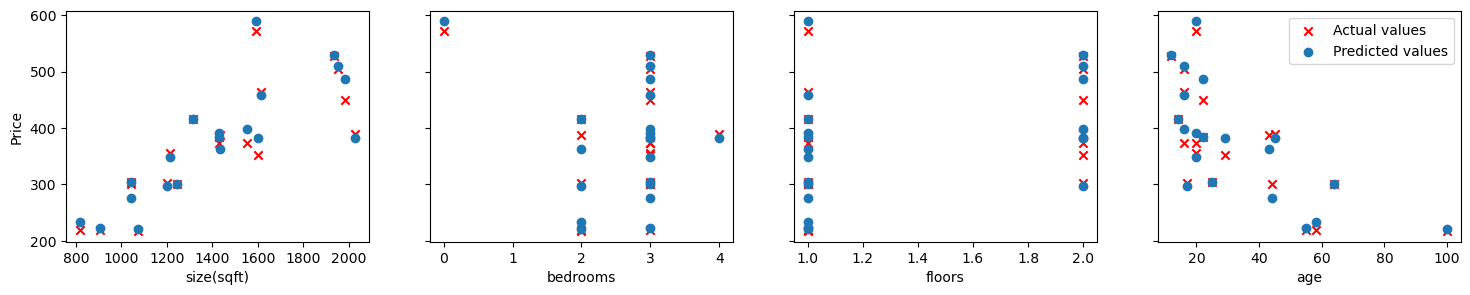

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(18, 3), sharey=True)

# Iterate over the axes and plot the data
for i in range(len(ax)):
    ax[i].scatter(x_test.iloc[:,i], y_test, marker='x', c='r', label='Actual values')
    ax[i].scatter(x_test.iloc[:,i], y_test_pred, label='Predicted values')
    ax[i].set_xlabel(x_features[i])
    if i == 0:
        ax[i].set_ylabel('Price')

plt.legend()
plt.show()